<a href="https://colab.research.google.com/github/shane-moxley/accident-fatality-prediction/blob/main/AI4ALL_Car_Accidents_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Projects Description

In [ ]:
import pandas as pd
import seaborn as sns
import numpy as np
from sklearn.cluster import KMeans as KMeans
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from mlxtend.plotting import plot_decision_regions

# For the KNN algorithm
from sklearn.neighbors import KNeighborsClassifier

# For the GaussianNB algorithm
from sklearn.naive_bayes import GaussianNB

# For the Logistic Regression algorithm
from sklearn.linear_model import LogisticRegression

%matplotlib inline
df = pd.read_csv('https://query.data.world/s/blqa522e3ejv23n7ifrh22574g2nxo')

Head of uncleaned dataset

In [ ]:
df.head()

,A_CRAINJ,A_CT,A_D15_19,A_D15_20,A_D16_19,A_D16_20,A_D16_24,A_D21_24,A_D65PLS,A_DIST,...,A_SPCRA,A_TOD,BIA,COUNTY,FATALS,INDIAN_RES,SPJ_INDIAN,STATE,ST_CASE,YEAR
0,1,1,2,2,2,2,2,2,1,2,...,2,1,NaN,21,2,NaN,NaN,1,10001,1982
1,1,1,2,2,2,2,2,2,2,2,...,2,2,NaN,97,1,NaN,NaN,1,10002,1982
2,1,1,2,2,2,2,2,2,2,2,...,1,1,NaN,103,1,NaN,NaN,1,10003,1982
3,1,1,1,1,1,1,1,2,2,2,...,1,2,NaN,45,2,NaN,NaN,1,10004,1982
4,1,1,2,2,2,2,2,2,2,2,...,2,1,NaN,97,1,NaN,NaN,1,10005,1982


A_CRAINJ =
A_CT = 
A_D15_20 = 
A_D21_24 = 
A_D65PLS = 
A_DIST = 
A_DOW = 
A_DROWSY = 
A_POSBAC = 
A_SPCRA = 
A_TOD = 
YEAR = year

In [ ]:
# see if you can make fatals binary, i.e -- make 1 fatality == 0 and fatalies greater than 1 == 1
year_select_df = df[(df['YEAR']  >= 2010)]
clean_df = year_select_df[['FATALS','A_CRAINJ','A_CT', 'A_D15_20','A_D21_24','A_D65PLS',
                                  'A_DIST', 'A_DOW', 'A_DROWSY', 'A_POSBAC', 'A_SPCRA',
                                  'A_TOD', 'YEAR']]                                                               
clean_df.rename(columns={'FATALS' : 'FATALITIES', 'A_CRAINJ' : 'INJURY_TYPE', 'A_CT' : 'CRASH_TYPE', 'A_D15_20' : 'BTWN_15_20', 'A_D21_24' : 'BTWN_21_24', 'A_D65PLS' : '65PLS', 'A_DIST' : 'DISTRACTED',
                  'A_DOW' : 'DOW', 'A_DROWSY' : 'DROWSY', 'A_POSBAC' : 'POSBAC', 'A_SPCRA' : 'SPEEDING', 'A_TOD' : 'TOD'}, inplace=True)                             
# Declares feature vector and target variable
X = clean_df
y = clean_df['FATALITIES']
# Feature scaling
cols = X.columns
ms = MinMaxScaler()
X = ms.fit_transform(X)
X = pd.DataFrame(X, columns=[cols])
X.head()

/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:5047: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


,FATALITIES,INJURY_TYPE,CRASH_TYPE,BTWN_15_20,BTWN_21_24,65PLS,DISTRACTED,DOW,DROWSY,POSBAC,SPEEDING,TOD,YEAR
0,0.0,0.0,0.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,1.0,0.5,0.0
1,0.0,0.0,0.0,1.0,1.0,1.0,1.0,0.0,1.0,0.5,1.0,0.0,0.0
2,0.0,0.0,1.0,1.0,1.0,1.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0
3,0.0,0.0,0.5,1.0,1.0,1.0,1.0,0.0,1.0,0.5,1.0,0.5,0.0
4,0.0,0.0,0.5,1.0,1.0,1.0,1.0,0.0,1.0,1.0,1.0,0.0,0.0


In [ ]:
# Declares feature vector and target variable
X = clean_df
y = clean_df['FATALS']
# Feature scaling
cols = X.columns
ms = MinMaxScaler()
X = ms.fit_transform(X)
X = pd.DataFrame(X, columns=[cols])
# Feature renaming
X.rename(columns={'FATALS' : 'FATALITIES', 'A_CRAINJ' : 'INJURY_TYPE', 'A_CT' : 'CRASH_TYPE', 'A_D15_20' : 'BTWN_15_20', 'A_D21_24' : 'BTWN_21_24', 'A_D65PLS' : '65PLS', 'A_DIST' : 'DISTRACTED',
                  'A_DOW' : 'DOW', 'A_DROWSY' : 'DROWSY', 'A_POSBAC' : 'POSBAC', 'A_SPCRA' : 'SPEEDING', 'A_TOD' : 'TOD'}, inplace=True)
X.head()

,FATALITIES,INJURY_TYPE,CRASH_TYPE,BTWN_15_20,BTWN_21_24,65PLS,DISTRACTED,DOW,DROWSY,POSBAC,SPEEDING,TOD,YEAR
0,0.0,0.0,0.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,1.0,0.5,0.0
1,0.0,0.0,0.0,1.0,1.0,1.0,1.0,0.0,1.0,0.5,1.0,0.0,0.0
2,0.0,0.0,1.0,1.0,1.0,1.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0
3,0.0,0.0,0.5,1.0,1.0,1.0,1.0,0.0,1.0,0.5,1.0,0.5,0.0
4,0.0,0.0,0.5,1.0,1.0,1.0,1.0,0.0,1.0,1.0,1.0,0.0,0.0


K-Means model with two clusters

In [ ]:
kmeans = KMeans(n_clusters=2, random_state=0)
kmeans.fit(X)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1692: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  FutureWarning,


KMeans(n_clusters=2, random_state=0)



* The KMeans algorithm clusters data by trying to separate samples in n groups of equal variances, minimizing a criterion known as inertia, or within-cluster sum-of-squares Inertia, or the within-cluster sum of squares criterion, can be recognized as a measure of how internally coherent clusters are.

* The k-means algorithm divides a set of N samples X into K disjoint clusters C, each described by the mean j of the samples in the cluster. The means are commonly called the cluster centroids.

* The K-means algorithm aims to choose centroids that minimize the inertia, or within-cluster sum of squared criterion.







In [ ]:
kmeans.cluster_centers_

array([[ 8.09000670e-03,  0.00000000e+00,  2.14057799e-01,
         8.29613043e-01,  8.10174236e-01,  8.95262753e-01,
         9.13917850e-01,  2.34049402e-01,  9.87656567e-01,
         5.02903926e-01, -2.27373675e-13,  2.92729690e-01,
         4.94201146e-01],
       [ 5.61456394e-03,  0.00000000e+00,  2.45389934e-01,
         8.83738740e-01,  8.70912647e-01,  7.84970111e-01,
         8.99418749e-01,  1.97264538e-01,  9.72463568e-01,
         6.79818738e-01,  1.00000000e+00,  2.49913226e-01,
         5.24522347e-01]])

In [ ]:
#model inertia too high
kmeans.inertia_

251326.38738686126

In [ ]:
scores = []
for clusters in range(2,16):
  kmeans = KMeans(n_clusters = clusters, random_state = 0)
  kmeans.fit(X)
  labels = kmeans.labels_
  # check how many of the samples were correctly labeled
  correct_labels = sum(y == labels)
  score = [clusters, correct_labels/float(y.size)]
  scores.append(score)
KMeans_scores = pd.DataFrame(scores, columns = ["CLUSTERS", "ACCURACY"])
display(KMeans_scores)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1692: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1692: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1692: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1692: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.

,CLUSTERS,ACCURACY
0,2,0.671569
1,3,0.194359
2,4,0.464560
3,5,0.201692
4,6,0.169742
5,7,0.168398
6,8,0.190327
7,9,0.231400
8,10,0.095675
9,11,0.083294


Elbow method to find optimal number of clusters


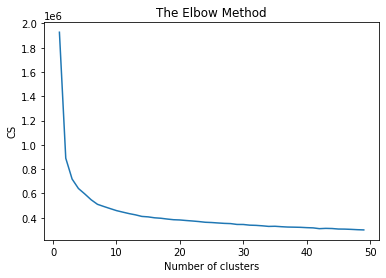

In [ ]:
from sklearn.cluster import KMeans
cs = []
for i in range(1, 50):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', max_iter = 300, n_init = 10, random_state = 0)
    kmeans.fit(X)
    cs.append(kmeans.inertia_)
plt.plot(range(1, 50), cs)
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('CS')
plt.show()


Silhouette Method to find optimal number of clusters

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1692: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1692: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1692: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1692: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.

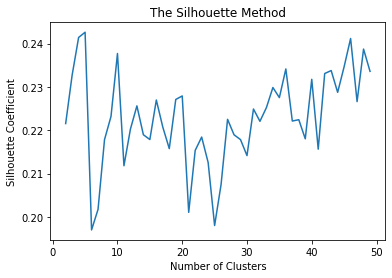

In [ ]:
import sklearn.cluster as cluster
import sklearn.metrics as metrics
ss = []
for i in range(2, 50):
  labels = cluster.KMeans(n_clusters = i, init = "k-means++", max_iter = 3000, n_init = 100, random_state = 0).fit(X).labels_
  ss.append(metrics.silhouette_score(X, labels, metric = "euclidean", sample_size = 1000, random_state = 0))
  
plt.plot(range(2, 50), ss)
plt.title("The Silhouette Method")
plt.xlabel("Number of Clusters")
plt.ylabel("Silhouette Coefficient")
plt.show()


Preliminary Analysis of data

In [ ]:
sns.pairplot(clean_df)

Training data set and testing data set selection

In [ ]:
X, y = clean_df.drop(columns=['FATALS']), clean_df['FATALS']

X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    test_size=0.3,
                                                    random_state=123,
                                                    shuffle=True)
print(f'X_train.shape: {X_train.shape}')
print(f'y_train.shape: {y_train.shape}')
print(f'X_test.shape: {X_test.shape}')
print(f'y_test.shape: {y_test.shape}')

X_train.shape: (177072, 12)
y_train.shape: (177072,)
X_test.shape: (75888, 12)
y_test.shape: (75888,)
         A_CRAINJ  A_CT  A_D15_20  A_D21_24  A_D65PLS  A_DIST  A_DOW  \
1313377         1     2         2         2         1       2      2   
1193694         1     2         2         2         2       2      1   
1092941         1     1         2         2         2       2      2   
1226909         1     1         1         2         2       1      1   
1141342         1     1         2         2         1       2      1   
...           ...   ...       ...       ...       ...     ...    ...   
1254994         1     1         2         2         2       2      2   
1080248         1     2         2         2         2       2      1   
1090548         1     2         1         2         2       2      2   
1078243         1     2         2         2         2       1      2   
1311860         1     1         2         2         2       2      2   

         A_DROWSY  A_POSBAC  A_SP

KNN

For KNeighborsClassifier(): 

Training set accuracy: 92.53%
Test set accuracy: 92.50%


ValueError: ignored

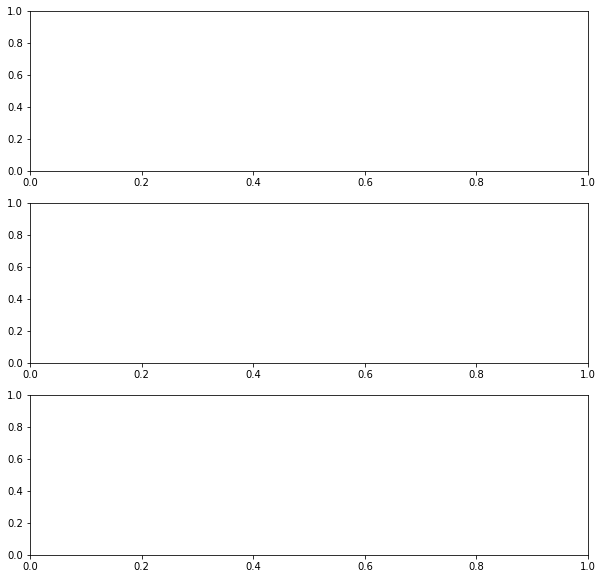

In [ ]:
fig, axes = plt.subplots(3,figsize=(10,10))
classifiers = [KNeighborsClassifier(), GaussianNB(), LogisticRegression()]
for model, ax in zip (classifiers, axes):
    clf=model.fit(X_train, y_train)
    print("=====================================")
    print("=====================================")
    print(f"For {model}: \n")
    print(f'Training set accuracy: {clf.score(X_train, y_train)*100:.2f}%')
    print(f'Test set accuracy: {clf.score(X_test, y_test)*100:.2f}%')
    plot_decision_regions(X_train, y_train, clf, ax=ax)

Random Forest

In [ ]:
features_per_tree = ["sqrt", "log2", None]     #None means max_features = n_features
scores =[]
y_test.head()
for n_trees in range(30, 80, 10):
  for n_features in features_per_tree:
    model2 = RandomForestClassifier(n_estimators = n_trees, max_features = n_features)
    model2.fit(X_train, y_train)
    score = [n_trees, n_features, model2.score(X_test, y_test)]
    scores.append(score)
RFscores = pd.DataFrame(scores, columns=["NUM_TREES", "FEATS_PER_TREE", "ACCURACY"])
display(RFscores)

,NUM_TREES,FEATS_PER_TREE,ACCURACY
0,30,sqrt,0.926444
1,30,log2,0.926431
2,30,None,0.926510
3,40,sqrt,0.926708
4,40,log2,0.926602
5,40,None,0.926141
6,50,sqrt,0.926747
7,50,log2,0.926536
8,50,None,0.926536
9,60,sqrt,0.926971
